In [1]:
import pandas as pd
import numpy as np

In [3]:
df_delivery = pd.read_csv("delivery_time.csv")
df_delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
df_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
#Count of duplicated rows
df_delivery[df_delivery.duplicated()].shape

(0, 2)

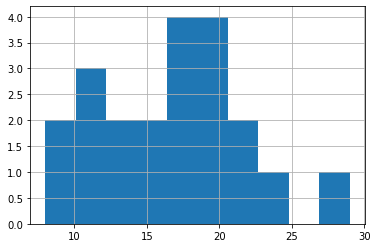

In [9]:
#outlier detection:
df_delivery['Delivery Time'].hist()

In [10]:
#Descriptive stat
df_delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


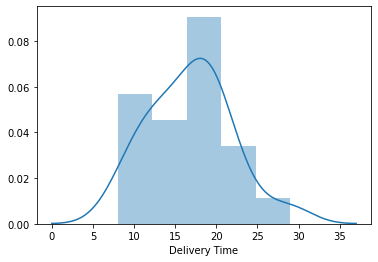

In [12]:
import seaborn as sns
sns.distplot(df_delivery['Delivery Time'])

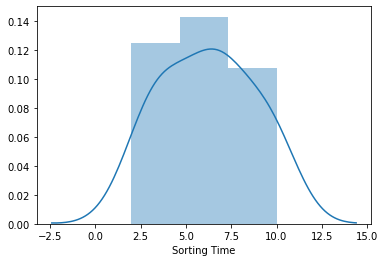

In [14]:
sns.distplot(df_delivery['Sorting Time'])

In [15]:
#correlation analysis:
df_delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


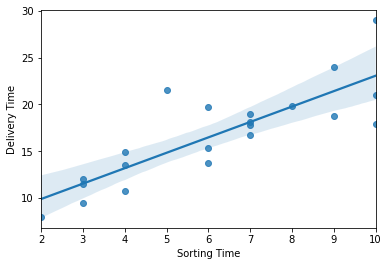

In [17]:
sns.regplot(x=df_delivery['Sorting Time'],y=df_delivery['Delivery Time'])

In [22]:
#Renaming columns:
# Renaming Columns
df_delivery=df_delivery.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df_delivery.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [23]:
import statsmodels.formula.api as smf

In [25]:
#Simple linear regression model building:
model=smf.ols("delivery_time~sorting_time",data=df_delivery).fit()

In [26]:
#Model trsting:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [29]:
#find the values:
model.tvalues,model.pvalues,model.rsquared,model.rsquared_adj

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64,
 0.6822714748417231,
 0.6655489208860244)

In [31]:
# Automatic Prediction for say sorting time 3,4
new_data=pd.Series([3,4])
new_data

0    3
1    4
dtype: int64

In [32]:
#Model prediction:
#Creating a new dataset:
data_pred = pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,3
1,4


In [33]:
model.predict(data_pred)

0    11.529794
1    13.178814
dtype: float64

In [34]:
##Salary hike regression problem:
df_salary = pd.read_csv("Salary_Data.csv")
df_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [35]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


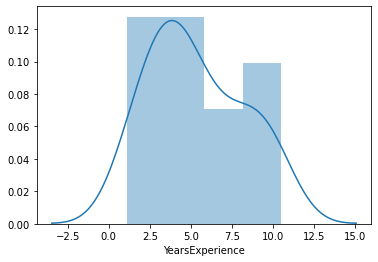

In [36]:
sns.distplot(df_salary['YearsExperience'])

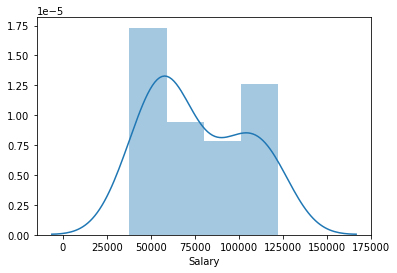

In [37]:
sns.distplot(df_salary['Salary'])

In [38]:
#Correaltion analysis:
df_salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


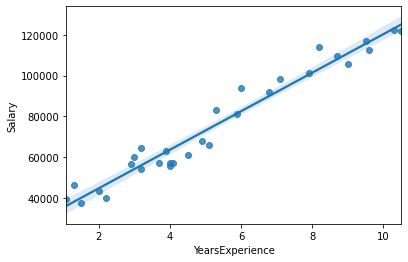

In [42]:
sns.regplot(x=df_salary['YearsExperience'],y=df_salary['Salary'])

In [43]:
#Simple linear regression model:
model_salary = smf.ols('Salary~YearsExperience',data=df_salary).fit()

In [56]:
#Testing the model:
model_salary.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [57]:
#Finding other values
model_salary.pvalues, model_salary.tvalues, model_salary.rsquared, model_salary.rsquared_adj

(Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64,
 Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 0.9569566641435086,
 0.9554194021486339)

In [58]:
new_data_salary = pd.Series([2,3])
new_data_salary

0    2
1    3
dtype: int64

In [59]:
#model prediction:
data_pred_salary=pd.DataFrame(new_data_salary,columns=['YearsExperience'])
data_pred_salary

,YearsExperience
0,2
1,3


In [60]:
model_salary.predict(data_pred_salary)

0    44692.124842
1    54142.087163
dtype: float64